Linear regression 을 학습하며, 기계학습의 원리 및 TensorFlow 를 익히는 notebook 입니다.

**라이브러리 Import 하기**

In [1]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


**X and Y data**

In [2]:
x_train = [1, 2, 3]

y_train = [2+0.1, 4-0.3, 6+0.15] # 약간의 noise 추가

# 다음의 것들도 해보시오
#y_train = [2, 4, 6] # 그냥 x_train 에 2배 곱해서 생성
#y_train = [3, 5, 7]

**Initialization**

In [3]:
#W = tf.Variable(tf.random_normal([1]), name='weight')
#b = tf.Variable(tf.random_normal([1]), name='bias')
w0 = 7.0;
b0 = 5.0;

W = tf.Variable(w0*tf.ones([1]), name='weight')
b = tf.Variable(b0*tf.ones([1]), name='bias')

**Our hypothesis XW+b**

In [4]:
hypothesis = x_train * W + b

**cost/loss function 정의하기**
* loss of one training example : 
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [5]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

**Optimizer**

In [6]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)


**Launch the graph in a session**

In [7]:
sess = tf.Session()

**Initializes global variables in the graph.** 

In [8]:
sess.run(tf.global_variables_initializer())

In [9]:
nb_epoch = 2001

for step in range(nb_epoch):
    sess.run(train)
    
    if step % 200 == 0: # 200번마다
        w1 = sess.run(W)[0] # 기울기
        b1 = sess.run(b)[0] # bias
        print(step, sess.run(loss), w1, b1)

0 191.49957 6.333 4.6996665
200 0.3571643 1.3710526 1.4199096
400 0.16119453 1.6209003 0.8519471
600 0.08636402 1.7752908 0.5009811
800 0.05778992 1.870695 0.284105
1000 0.046878833 1.9296489 0.15008862
1200 0.04271253 1.9660789 0.06727502
1400 0.041121576 1.9885905 0.016101124
1600 0.040514145 2.002501 -0.015521131
1800 0.040282175 2.011097 -0.035061788
2000 0.04019362 2.016409 -0.047137044



**학습완료**

In [10]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias

출력해보기

In [11]:
print(w1, b1)

str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

2.016409 -0.047137044
y = 2.016409x + -0.047137044


Text(0.5, 1.0, 'y = 2.016409x + -0.047137044')

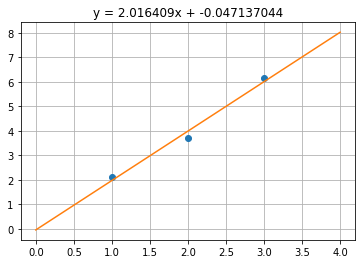

In [12]:
plt.figure(figsize=(6,4)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)

### 스스로 해보기
아래 부분을 수정해서 처음부터 다시 진행해보기 바랍니다. 

* 예1) 노이즈를 다르게 준다
```
x_train = [1, 2, 3]
y_train = [2+0.1, 4-0.3, 6+0.15] # 약간의 noise 추가
```
* 예2) 데이터의 갯수를 지금은 네 개의 점으로 했으나 더 늘려서도 해본다.

* 예3) 데이터의 모델을 현재는 y=2x+0 으로 해서 만들었으나, 바꾸어본다.
```
y=3x-5 
y=1.2x + 3
```

* 예4) 초기값인 w0, b0를 다르게 설정해본다.
```
w0 = 7.0;
b0 = 5.0;
```